#CNN Architecture Assigment


**Question 1: What is the role of filters and feature maps in Convolutional Neural Network (CNN)?**

**Answer:**

* Filters (Kernels):

Filters are small matrices of weights that slide (convolve) over the input image or feature map. Each filter is responsible for detecting a specific type of feature — for example:
1. Edges (horizontal, vertical)
2. Textures
3. Corners
4. Complex patterns (in deeper layers)

The filter performs an element-wise multiplication and summation operation (convolution) with a region of the input image, generating a new matrix that highlights where that feature is found.

* Feature Maps (Activation Maps):

The feature map is the output generated after applying a filter to the input. It represents the spatial locations where the filter has detected a particular feature in the image.
As the network goes deeper:

1. Lower layers capture simple features (edges, colors)
2. Higher layers capture complex, abstract features (shapes, objects)

**Question 2: Explain the concepts of padding and stride in CNNs(Convolutional Neural Network).How do they affect the output dimensions of feature maps?**

**Answer:**

In a Convolutional Neural Network (CNN), padding and stride are two important parameters that control how convolution operations are applied to the input and how large the resulting feature maps will be.

1. Padding:

Padding refers to adding extra pixels (usually zeros) around the border of the input image before applying the convolution operation.

Purpose:
* To control the spatial size (height and width) of the output feature map.
* To preserve edge information that would otherwise be lost during convolution.

2. Stride:

Stride determines how many pixels the filter moves (slides) over the input after each operation.

Effect:
1. A stride of 1 means the filter moves one pixel at a time (dense sampling).
2. A stride > 1 means the filter skips some pixels, reducing the size of the output feature map.

**Question 3: Define receptive field in the context of CNNs. Why is it important for deep architectures?**

**Answer:**
The receptive field is the input area influencing a neuron’s activation.

It is crucial because deeper CNN layers need a large receptive field to understand global features and make high-level decisions about the input data.

Some important params are:

1. Captures Contextual Information:
A larger receptive field allows deeper layers to understand broader spatial relationships — not just small local patterns but also overall object structure.

2. Feature Hierarchy:
Early layers detect edges or textures, while deeper layers (with larger receptive fields) detect complex shapes and objects.

3. Better Decision Making:
For classification or detection, neurons with a large receptive field can make predictions based on global context, improving accuracy and robustness.

**Question 4: Discuss how filter size and stride influence the number of parameters in a CNN.**

**Answer:**
1. Filter Size (Kernel Size): The filter size refers to the dimensions of the convolution kernel (e.g., 3×3, 5×5, 7×7).

Effect on Number of Parameters:

Each filter has parameters equal to:

(Filter height)×(Filter width)×(Number of input channels)

Plus one bias term per filter.

* Larger filters (e.g., 5×5, 7×7) mean more weights to learn, hence more parameters and higher computation cost.
* Smaller filters (e.g., 3×3) reduce parameters and are more efficient — this is why modern CNNs (like VGG, ResNet) prefer 3×3 filters stacked deeper.

 2. Stride: Stride determines how far the filter moves across the input during convolution.

* Effect on Number of Parameters:
1. Stride does not affect the number of parameters.
2. The filter weights remain the same, regardless of stride.

However, stride affects the output feature map size, which impacts:
1. The number of activations (output neurons)
2. The computational cost in later layers

**Question 5: Compare and contrast different CNN-based architectures like LeNet,AlexNet, and VGG in terms of depth, filter sizes, and performance.**

**Answer:**

| Feature         | **LeNet-5**       | **AlexNet**                     | **VGG16/VGG19**                                     |
| --------------- | ----------------- | ------------------------------- | --------------------------------------------------- |
| **Depth**       | 5 layers          | 8 layers                        | 16–19 layers                                        |
| **Filter Size** | 5×5               | 11×11, 5×5, 3×3                 | 3×3 (uniform)                                       |
| **Activation**  | Sigmoid/Tanh      | ReLU                            | ReLU                                                |
| **Pooling**     | Average           | Max                             | Max                                                 |
| **Parameters**  | ~60K              | ~60M                            | ~138M                                               |
| **Dataset**     | MNIST (grayscale) | ImageNet (color, 1000 classes)  | ImageNet                                            |
| **Performance** | Good for digits   | Major improvement               | Very high accuracy                                  |
| **Innovation**  | Introduced CNNs   | Introduced ReLU + GPU + Dropout | Showed deeper + smaller filters improve performance |


In [ ]:
'''
Question 6: Using keras, build and train a simple CNN model on the MNIST dataset
from scratch. Include code for module creation, compilation, training, and evaluation.
(Include your Python code and output in the code box below.)

Answer:
'''
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape data to fit CNN input (samples, height, width, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values (0–255) to (0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. Build the CNN model
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and connect to dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 digits)
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)

# 5. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 6. Display model summary
model.summary()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 - 11s - 11ms/step - accuracy: 0.9495 - loss: 0.1729 - val_accuracy: 0.9829 - val_loss: 0.0527
Epoch 2/5
938/938 - 3s - 3ms/step - accuracy: 0.9836 - loss: 0.0521 - val_accuracy: 0.9852 - val_loss: 0.0466
Epoch 3/5
938/938 - 3s - 3ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0.9879 - val_loss: 0.0381
Epoch 4/5
938/938 - 3s - 3ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9878 - val_loss: 0.0363
Epoch 5/5
938/938 - 3s - 4ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9918 - val_loss: 0.0245

Test Accuracy: 0.9918
Test Loss: 0.0245


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [ ]:
'''
Question 7: Load and preprocess the CIFAR-10 dataset using Keras, and create a
CNN model to classify RGB images. Show your preprocessing and architecture.
(Include your Python code and output in the code box below.)

Answer:
'''

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Original Training data shape:", x_train.shape)
print("Original Test data shape:", x_test.shape)

# 2. Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("After preprocessing:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# 4. Build CNN Model
model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)

# 7. Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 8. Display model summary
model.summary()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Original Training data shape: (50000, 32, 32, 3)
Original Test data shape: (10000, 32, 32, 3)
After preprocessing:
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
Epoch 1/10
782/782 - 17s - 22ms/step - accuracy: 0.4418 - loss: 1.5213 - val_accuracy: 0.5914 - val_loss: 1.1521
Epoch 2/10
782/782 - 5s - 6ms/step - accuracy: 0.6087 - loss: 1.0976 - val_accuracy: 0.6834 - val_loss: 0.8989
Epoch 3/10
782/782 - 5s - 7ms/step - accuracy: 0.6694 - loss: 0.9337 - val_accuracy: 0.7066 - val_loss: 0.8274
Epoch 4/10
782/782 - 5s - 7ms/step - accuracy: 0.7079 - loss: 0.8280 - val_accuracy: 0.7294 - val_loss: 0.7764
Epoch 5/10
782/782 - 11s - 13ms/step - accuracy: 0.7322 - loss: 0.7625 - val_accuracy: 0.7540 - val_loss: 0.7039
Epoch 6/10
782/782 - 5s - 7ms/step - accuracy: 0.7527 - loss: 0.7024 - val_accuracy: 0.7583 - val_loss: 0.6936
Epoch 7/10
782/782 - 5s - 7ms/step - accuracy: 0.7720 - loss: 0.6513 - val_accuracy: 0.7690 - val_los

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,505,088 (24.81 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,336,726 (16.54 MB)

In [ ]:
'''
Question 8: Using PyTorch, write a script to define and train a CNN on the MNIST
dataset. Include model definition, data loaders, training loop, and accuracy evaluation.
(Include your Python code and output in the code box below.)

Answer:
'''
# Import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# 2. Data preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),                # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 3. Define the CNN architecture
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)     # 1 input channel, 32 filters, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, 3, 1)    # 32 input, 64 output filters
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)         # Flattened input -> 128 neurons
        self.fc2 = nn.Linear(128, 10)           # 10 output classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize model
model = CNNModel().to(device)

# 4. Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 5. Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}")

# 6. Evaluation on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f"\nTest Accuracy: {accuracy:.2f}%")

# 7. Model summary (number of parameters)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {total_params}")


Using device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 344kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


Epoch [1/5], Training Loss: 0.2104
Epoch [2/5], Training Loss: 0.0851
Epoch [3/5], Training Loss: 0.0680
Epoch [4/5], Training Loss: 0.0559
Epoch [5/5], Training Loss: 0.0474

Test Accuracy: 98.99%
Total Trainable Parameters: 1199882


In [1]:
'''
Question 9: Given a custom image dataset stored in a local directory, write code using
Keras ImageDataGenerator to preprocess and train a CNN model.
(Include your Python code and output in the code box below.)

Answer:
'''
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Path to your dataset folder
dataset_dir ='/content/drive/MyDrive/Dataset'# contains 'cats/' and 'dogs/'

# 1. Data preprocessing and automatic split (80% train, 20% validation)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   # split 20% data for validation
)

# 2. Create train and validation generators
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',   # binary since only cats & dogs
    subset='training'      # set as training data
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'    # set as validation data
)

# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # 1 neuron for binary classification
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5. Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 6. Evaluate model performance
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")

# 7. Display model summary
model.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 287s 11s/step - accuracy: 0.5136 - loss: 0.8090 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step - accuracy: 0.4973 - loss: 0.6933 - val_accuracy: 0.5050 - val_loss: 0.6921
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 372ms/step - accuracy: 0.5532 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - accuracy: 0.4892 - loss: 0.6933 - val_accuracy: 0.5200 - val_loss: 0.6940
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.5669 - loss: 0.6876 - val_accuracy: 0.5000 - val_loss: 0.6973
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.5409 - loss: 0.6875 - val_accuracy: 0.5250 - val_loss: 0.6907
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.5730 - loss: 0.6835 - val_accuracy: 0.5250 - val_loss: 0.6914
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.5841 - loss: 0.6840 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 865s 5s/step - accuracy: 0.7435 - loss: 0.5654 - val_accuracy: 0.8125 - val_loss: 0.6775
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 540ms/step - accuracy: 0.8713 - loss: 0.3060 - val_accuracy: 0.8750 - val_loss: 0.5354
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 533ms/step - accuracy: 0.9066 - loss: 0.2276 - val_accuracy: 0.7500 - val_loss: 0.6408
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 525ms/step - accuracy: 0.9199 - loss: 0.2182 - val_accuracy: 0.8125 - val_loss: 0.5565
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 527ms/step - accuracy: 0.9231 - loss: 0.1888 - val_accuracy: 0.6875 - val_loss: 1.1642
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 518ms/step - accuracy: 0.9354 - loss: 0.1822 - val_accuracy: 0.8125 - val_loss: 0.6563
Epoch

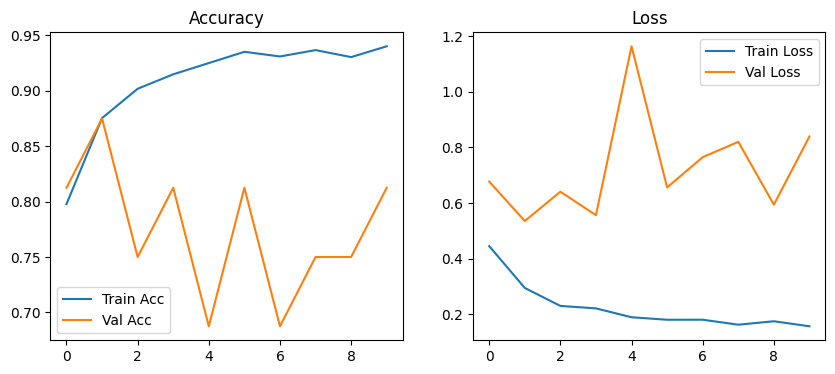

✅ Model saved as chest_xray_cnn_model.h5


UsageError: Line magic function `%%writefile` not found.


In [3]:
'''
Question 10: You are working on a web application for a medical imaging startup. Your
task is to build and deploy a CNN model that classifies chest X-ray images into “Normal”
and “Pneumonia” categories. Describe your end-to-end approach–from data preparation
and model training to deploying the model as a web app using Streamlit.
(Include your Python code and output in the code box below.)

Answer:

'''

# ==========================================
# Question 10: Chest X-Ray Classification Web App (Normal vs Pneumonia)
# ==========================================

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# -----------------------------
# 1. DATA PREPARATION
# -----------------------------

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to dataset (upload from Kaggle)
dataset_path = '/content/drive/MyDrive/chest_xray'  # change if needed
train_dir = os.path.join(dataset_path, 'train')
val_dir   = os.path.join(dataset_path, 'val')
test_dir  = os.path.join(dataset_path, 'test')

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# -----------------------------
# 2. BUILD CNN MODEL
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Normal vs Pneumonia)
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 3. TRAIN THE MODEL
# -----------------------------
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# -----------------------------
# 4. EVALUATE MODEL
# -----------------------------
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

loss, acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

# -----------------------------
# 5. SAVE MODEL
# -----------------------------
model.save('/content/chest_xray_cnn_model.h5')
print("✅ Model saved as chest_xray_cnn_model.h5")

# -----------------------------
# 6. STREAMLIT DEPLOYMENT SCRIPT
# -----------------------------
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

st.set_page_config(page_title="Chest X-Ray Classifier", layout="wide")

st.title("🩺 Chest X-Ray Classifier")
st.write("Upload a chest X-ray image to classify as **Normal** or **Pneumonia**.")

model = tf.keras.models.load_model('chest_xray_cnn_model.h5')

uploaded_file = st.file_uploader("Choose an X-ray image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert('RGB')
    st.image(img, caption='Uploaded Image', use_container_width=True)
    img = img.resize((150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    pred = model.predict(x)
    result = "🟢 NORMAL" if pred < 0.5 else "🔴 PNEUMONIA"
    st.subheader(f"Prediction: {result}")

st.markdown("---")
st.caption("Model trained using Chest X-Ray Dataset (Kaggle). Built with TensorFlow & Streamlit.")

# -----------------------------
# 7. HOW TO RUN STREAMLIT APP (locally or on Colab)
# -----------------------------
# In Colab (optional): use localtunnel or ngrok to open Streamlit UI
# !pip install streamlit localtunnel
# !streamlit run app.py & npx localtunnel --port 8501
